In [ ]:
import math

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

In [ ]:
import numpy as np

In [ ]:
!pip install galois
!pip install reedsolo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 803 kB 9.8 MB/s 
     |████████████████████████████████| 3.3 MB 36.3 MB/s 
     |████████████████████████████████| 34.5 MB 7.2 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 6.7 MB/s 
  Created wheel for reedsolo: filename=reedsolo-1.5.4-cp37-cp37m-linux_x86_64.whl size=706448 sha256=09e8040b76109c3fe4bf6285d56592be9fd1010769bc3eff23896733f31a5f79
  Stored in directory: /root/.cache/pip/wheels/20/b9/92/6b9dcd4ed356565c382d97443dfb6206f614

In [ ]:
import galois
from reedsolo import RSCodec

In [ ]:
class Decoding:

  def DNA_to_Bi(arr):
    bi_arr = np.zeros((np.size(arr, axis = 0), (np.size(arr, axis = 1)*2)), dtype = np.int64)
    for i in range(0, np.size(arr, axis = 0)):
      for j in range(0, np.size(arr, axis = 1)):
        if arr[i, j] == 'G':
          bi_arr[i, 2*j] = 0
          bi_arr[i, 2*j+1] = 0
        elif arr[i, j] == 'A':
          bi_arr[i, 2*j] = 1
          bi_arr[i, 2*j+1] = 0
        elif arr[i, j] == 'C':
          bi_arr[i, 2*j] = 0
          bi_arr[i, 2*j+1] = 1
        elif arr[i, j] == 'T':
          bi_arr[i, 2*j] = 1
          bi_arr[i, 2*j+1] = 1
        else:
          print("값이 ATCG가 아님 :", arr[i, j])
          raise ValueError
    return bi_arr


  def bi_to_deci(arr):
    sum = 0
    pos = 0
    for i in range(0, len(arr)):
      sum += arr[i] * 2 ** pos
      pos += 1
    return sum

  def pari_to_deci(arr):

    parity_deci = np.zeros((np.size(arr, axis = 0), 8),dtype = np.int64)
    pos = 0
    for i in range(0, np.size(arr, axis = 0)):
      sum = 0
      j = 0
      while(1):
        if j == 64:
          break
        sum += arr[i, j] * 2 ** pos
        j+=1
        pos+=1
        if j % 8 == 0:
          parity_deci[i, (j//8)-1] = sum
          sum = 0 
          pos = 0
      return parity_deci

  def check_reed(arr, reed):
    #리드솔로몬 만들었을때 나온 array
    arr_index_pari= np.concatenate((arr, reed), axis = 1).astype('uint8')
    parity = 8
    gf_en = galois.GF(2**3)#이건 그냥 2**3으로 한다고 약속 하고 한거
    rsc = RSCodec(parity)#8개의 parity를 만든다.
    #rsc 디코딩한 값과 다르면 디코딩한 데이터로 치환
    for i in range(0, np.size(arr, axis = 0)):
      if np.all((np.array(rsc.decode(arr_index_pari[i])[0]) == arr[i])):
        print("리드솔로몬결과 데이터값 이상 없음")
        pass
      else:
        arr[i] = np.array(rsc.decode(arr_index_pari[i])[0])
        print(i, ", 에서 바꿔짐")
      return arr
    

In [ ]:
DNA_data = []
text_file = open('/content/drive/MyDrive/no_com/jpg/image_color_norm.txt', 'r')
while True:
    line = text_file.readline()
    if not line: break
    DNA_data.append(line[:-1])
text_file.close()

In [ ]:
DNA_data

['TTCGTTCGTCGTTGATTGGTTTGCTCGCTACGCTAGTGTGCGGCGTAGCGAGCCAGTTCGATCGATCGGGAGTGAGACAGGAAGGAAGGAAGCTAGATGCAAGCTCCGAGCAACACACAAACGAGGGTCAAAACGGAGCCATGAGTTTGT',
 'TTCGTTCGTCGTTGATTGGTGGCCTCGCAGTTAGCTAGTAAGAAAGTAAGTAAGAAAGCAAGAAAGGGAGTCCGCCCGTGCGTCCGTCCGGGTGAAAGGATGGAACGCCATGGGTAGTTGAAGTTATGCGAAACGGAGCCATGAGTTTGT',
 'TTCGTTCGTCGTTGATTGGTCGCCTCGCTTAGTGTGGCTGAGTGGGTGGGTGATAGCTAGGTAGGTAGGTAGGTAGGTAGCCTGGTAGACCGCCCGACATCACCATGCTCCGCGGATTCACACGGCATTGAAACGGAGCCATGAGTTTGT',
 'TTCGTTCGTCGTTGATTGGTAGCCTCGCCGCCCGAGCGCCAGCCTGCTAGCAAGTAAGTAAGCAAGTAAGGGTGGGTGCGTGAGTGAGTGCGTGCGTGGGCCATGCAAGGACGATCAATTACTACAGGGTAAACGGAGCCATGAGTTTGT',
 'TTCGTTCGTCGTTGATTGGTTGCCTCGCGGTGGGTGGGTGCAAGACCGAGCGGGCGTCCGATCGACGCGTGCAGGCCCGCGCGCCCGCACGCTTTGTGTCTGCCGCCCTAATGCGTACGACCACTGTAGAAAACGGAGCCATGAGTTTGT',
 'TTCGTTCGTCGTTGATTGGTGCCCTCGCGCTGGCCGGCATTGATTGGGGCCGGCGGGCTTTGGTTGCTTGTATGCATGAATGTTTGGGGCTTTGGTTGGACAGTTTACTTTGAATCTAGCGGTGCCCGCTAAACGGAGCCATGAGTTTGT',
 'TTCGTTCGTCGTTGATTGGTCCCCTCGCCTTGCGGCCCGCGAGCTCGCCCGCTGGCCGGCTTTGCTTG

In [ ]:
len(DNA_data[0])

150

In [ ]:
payload = []
for seq in DNA_data:
  payload.append(seq[20:-20])

In [ ]:
payload

['TTGCTCGCTACGCTAGTGTGCGGCGTAGCGAGCCAGTTCGATCGATCGGGAGTGAGACAGGAAGGAAGGAAGCTAGATGCAAGCTCCGAGCAACACACAAACGAGGGTCA',
 'GGCCTCGCAGTTAGCTAGTAAGAAAGTAAGTAAGAAAGCAAGAAAGGGAGTCCGCCCGTGCGTCCGTCCGGGTGAAAGGATGGAACGCCATGGGTAGTTGAAGTTATGCG',
 'CGCCTCGCTTAGTGTGGCTGAGTGGGTGGGTGATAGCTAGGTAGGTAGGTAGGTAGGTAGCCTGGTAGACCGCCCGACATCACCATGCTCCGCGGATTCACACGGCATTG',
 'AGCCTCGCCGCCCGAGCGCCAGCCTGCTAGCAAGTAAGTAAGCAAGTAAGGGTGGGTGCGTGAGTGAGTGCGTGCGTGGGCCATGCAAGGACGATCAATTACTACAGGGT',
 'TGCCTCGCGGTGGGTGGGTGCAAGACCGAGCGGGCGTCCGATCGACGCGTGCAGGCCCGCGCGCCCGCACGCTTTGTGTCTGCCGCCCTAATGCGTACGACCACTGTAGA',
 'GCCCTCGCGCTGGCCGGCATTGATTGGGGCCGGCGGGCTTTGGTTGCTTGTATGCATGAATGTTTGGGGCTTTGGTTGGACAGTTTACTTTGAATCTAGCGGTGCCCGCT',
 'CCCCTCGCCTTGCGGCCCGCGAGCTCGCCCGCTGGCCGGCTTTGCTTGTATGGTTGATTGGGGCGGGCGCGCTCGCAGTTCTTAACCGTTGATTGGGACTGATCAGTCCA',
 'ACCCTCGCGCTTTGCTTGAGGCCAGCAGGCATTGAGCGTCCGCCCGGCAGGAAGGAAGCAAGTAAGGTAGCAAGTGAGGCTTTCCGCGAACATCTACACGGAAGCAAGTA',
 'TCCCTCGCTTCGAGAGCAAGATAGTGAGAGAGTGAGTCAGTAAGACCGCGCGGACGTACGGAAGCCAGCCAGAAAGAG

In [ ]:
bi_arr = np.zeros((len(payload), len(payload[0])*2), dtype = np.int64)
for i in range(0, len(payload)):
  for j in range(0, len(payload[0])):
    if payload[i][j] == 'G':
      bi_arr[i][2*j] = 0
      bi_arr[i][2*j+1] = 0
    elif payload[i][j] == 'C':
      bi_arr[i][2*j] = 1
      bi_arr[i][2*j+1] = 0
    elif payload[i][j] == 'A':
      bi_arr[i][2*j] = 0
      bi_arr[i][2*j+1] = 1
    elif payload[i][j] == 'T':
      bi_arr[i][2*j] = 1
      bi_arr[i][2*j+1] = 1
    else:
      print("값이 ATCG가 아님 :", payload[j])
      raise ValueError

In [ ]:
bi_arr.shape

(29025, 220)

In [ ]:
bi_arr[0]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
index_bits = np.size(bi_arr, axis=0)
index_bits = math.ceil(math.log2(index_bits))
if index_bits % 2 == 1:
  index_bits+=1
print(index_bits)

16


In [ ]:
index_arr = bi_arr[:,:index_bits]
mess_arr = bi_arr[:,index_bits:-64]
reed_arr = bi_arr[:, -64:]

In [ ]:
print(index_arr.shape, mess_arr.shape, reed_arr.shape)

(29025, 16) (29025, 140) (29025, 64)


In [ ]:
index_arr

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1]])

In [ ]:
index = []
for i in range(0, np.size(index_arr, axis = 0)):
  index.append(Decoding.bi_to_deci(index_arr[i]))

In [ ]:
len(index)

29025

In [ ]:
deci_index = index-index[0]
print(deci_index)

[    0     1     2 ... 29022 29023 29024]


In [ ]:
dimension = Decoding.bi_to_deci(mess_arr[-1][0:2])
pix_row = Decoding.bi_to_deci(mess_arr[-1][2:12])
pix_col = Decoding.bi_to_deci(mess_arr[-1][12:22])
jpg_Null = Decoding.bi_to_deci(mess_arr[-1][22:30])
fragments = Decoding.bi_to_deci(mess_arr[-1][30:50])
index_bits_len = Decoding.bi_to_deci(mess_arr[-1][50:58])

In [ ]:
print(dimension, pix_row, pix_col, jpg_Null, fragments, index_bits_len)

2 834 609 112 29025 16


In [ ]:
mess = mess_arr[0:-1].flatten()
mess = mess[:-jpg_Null]

In [ ]:
mess.shape

(4063248,)

In [ ]:
mess = mess.reshape((mess.size//8, 8))

In [ ]:
picture = []
for i in range(0, np.size(mess, axis = 0)):
  picture.append(Decoding.bi_to_deci(mess[i]))

In [ ]:
if dimension == 3:
  picture = np.array(picture).reshape(pix_row, pix_col, dimension)
elif dimension == 2:
  picture = np.array(picture).reshape(pix_row, pix_col)

In [ ]:
picture.shape

(834, 609)

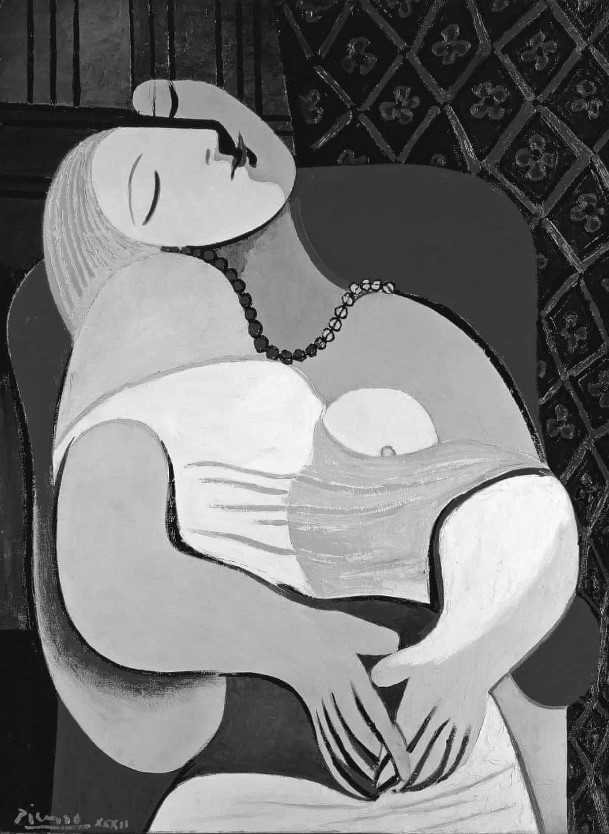

In [ ]:
cv2_imshow(picture)

In [ ]:
cv2.imwrite('/content/drive/MyDrive/no_com/jpg/image_gray_norm.jpeg', picture)

True